# 8장 자연어 처리 시작하기

* 설치 목록
    * JDK (Java SE Downloads)
    * JAVA_HOME 설정
    * JPype 설치
    * KoNLPy 설치
    * Word Cloud 설치

## 1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

* KoNLPy : **pip install konlpy**
* JPype1 : **conda install -c conda-forge jpype1** 
    * 이후 Jupyter Notebook 재실행 필요
* JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치
    * JAVA_HOME 설정 : 교재내용 참조

## 2. 한글 자연어 처리 기초

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [9]:
from konlpy.tag import Twitter
t = Twitter()

In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작합', '니다', '재미있어', '요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작합', 'Verb'),
 ('니다', 'Eomi'),
 ('재미있어', 'Adjective'),
 ('요', 'Eomi'),
 ('~~', 'Punctuation')]

## 3. 워드 클라우드

* WordCloud 설치 : **pip install wordcloud**

In [13]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [14]:
text = open('data/09. alice.txt').read()
alice_mask = np.array(Image.open('data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [15]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

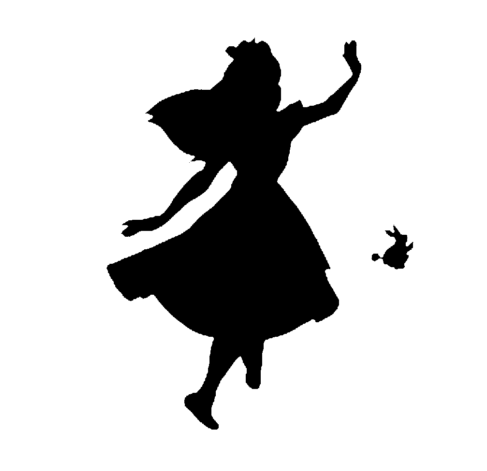

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

[('Alice', 1.0),
 ('little', 0.3316062176165803),
 ('one', 0.2694300518134715),
 ('know', 0.23316062176165803),
 ('went', 0.21502590673575128),
 ('thing', 0.20725388601036268),
 ('time', 0.19948186528497408),
 ('thought', 0.19689119170984457),
 ('Queen', 0.17875647668393782),
 ('see', 0.17357512953367876),
 ('well', 0.16321243523316062),
 ('King', 0.16062176165803108),
 ('now', 0.15544041450777202),
 ('Turtle', 0.15284974093264247),
 ('head', 0.15284974093264247),
 ('began', 0.15025906735751296),
 ('way', 0.14766839378238342),
 ('Hatter', 0.14507772020725387),
 ('Mock', 0.14507772020725387),
 ('quite', 0.14248704663212436),
 ('say', 0.14248704663212436),
 ('Gryphon', 0.14248704663212436),
 ('think', 0.13730569948186527),
 ('first', 0.13212435233160622),
 ('voice', 0.13212435233160622),
 ('much', 0.13212435233160622),
 ('go', 0.12953367875647667),
 ('come', 0.12435233160621761),
 ('cat', 0.12435233160621761),
 ('never', 0.12176165803108809),
 ('Rabbit', 0.12176165803108809),
 ('Oh', 0.1

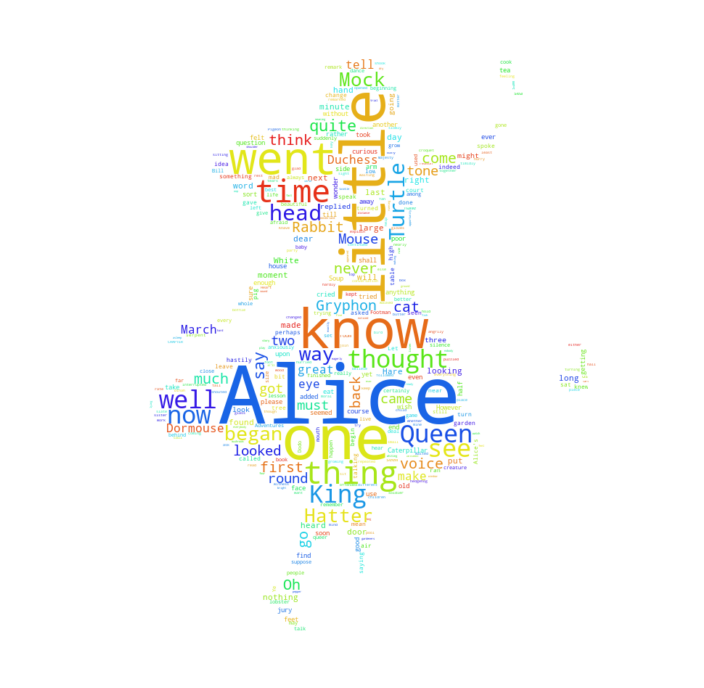

In [18]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
text = open('data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data/09. stormtrooper_mask.png'))

In [20]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [21]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [22]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

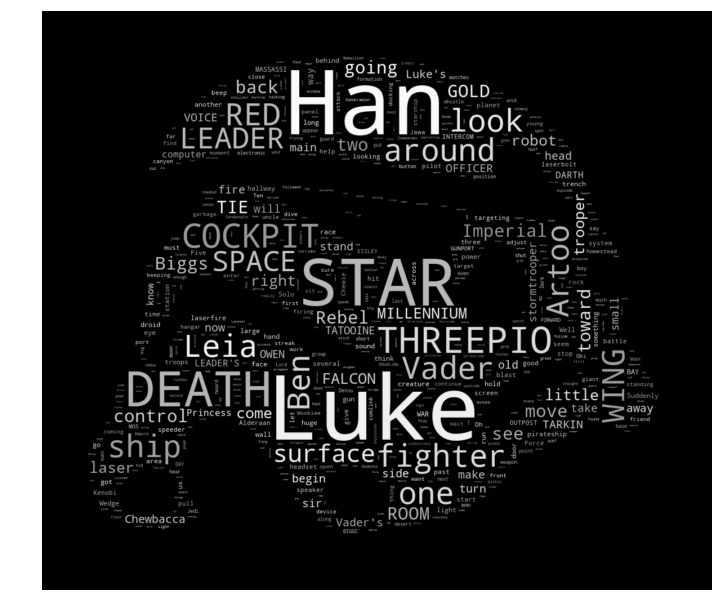

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 4. 육아휴직관련 법안 대한민국 국회 제 1809890호 의안

In [25]:
import nltk

In [26]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [27]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [28]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '조제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',


In [29]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [30]:
print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens
ko.vocab()                        # returns frequency distribution

735
258


FreqDist({'가능': 4,
          '가정': 7,
          '각': 1,
          '값': 2,
          '개': 1,
          '개정': 8,
          '개정안': 3,
          '거나': 1,
          '것': 6,
          '것임': 2,
          '경비': 1,
          '경우': 16,
          '고': 1,
          '고용': 14,
          '고용노동부': 3,
          '곧': 1,
          '공': 1,
          '공무원': 10,
          '공포': 1,
          '관련': 2,
          '교육': 4,
          '구조': 1,
          '국가': 2,
          '국가공무원': 2,
          '국회예산정책처': 2,
          '규정': 1,
          '규칙': 1,
          '근거': 1,
          '근로자': 3,
          '급여': 8,
          '기': 1,
          '기간': 1,
          '기업체': 1,
          '기자': 1,
          '김': 1,
          '김을동': 1,
          '김정훈': 1,
          '김학송': 1,
          '까지': 1,
          '나이': 2,
          '날': 1,
          '남녀': 1,
          '내용': 1,
          '년': 7,
          '논의': 1,
          '느': 1,
          '다만': 1,
          '다시': 1,
          '다음': 5,
          '단서': 1,
          '단위': 1,
          '대상': 2,
   

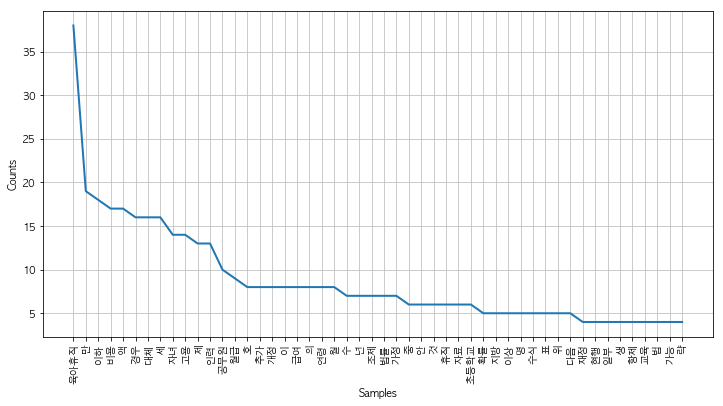

In [31]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [32]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '조제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '어',
 '느',
 '하나',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 

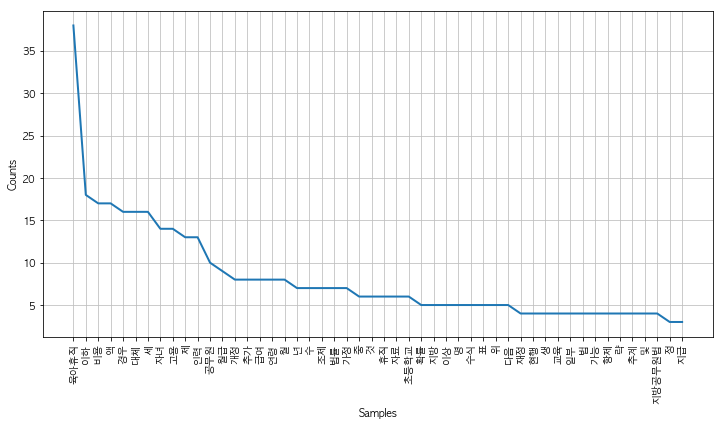

In [33]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [34]:
ko.count('초등학교')

6

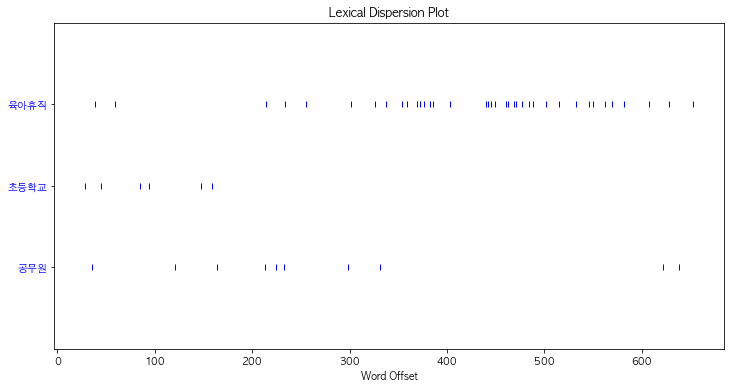

In [35]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [36]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 주요 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직
필요 나이 현재 공무원 자녀 양육 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것임
개정 법률 지방공무원법 일부 다음 개정 제 조제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 현 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년
이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년 이하 여 여자 공무원 자녀 임신 출산 때 생 략 생 략 현행


In [37]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


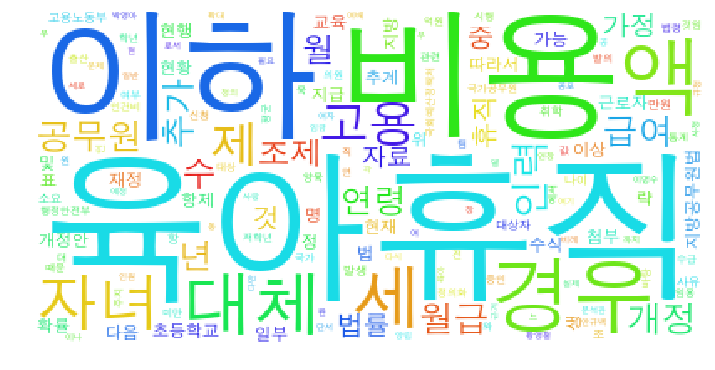

In [38]:
data = ko.vocab().most_common(150)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 5. Naive Bayes Classifier의 이해 - 영문

In [39]:
from nltk.tokenize import word_tokenize
import nltk

In [40]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [41]:
all_words = set(word.lower() for sentence in train 
                                for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [42]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) 
                                             for x in train]
t

[({'hate': False,
   'her': False,
   'i': True,
   'like': True,
   'me': False,
   'you': True},
  'pos'),
 ({'hate': True,
   'her': False,
   'i': True,
   'like': False,
   'me': False,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': False,
   'i': False,
   'like': True,
   'me': True,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': True,
   'i': True,
   'like': True,
   'me': False,
   'you': False},
  'pos')]

In [43]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                     her = False             neg : pos    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0


In [44]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): 
                      (word in word_tokenize(test_sentence.lower())) 
                      for word in all_words}
test_sent_features

{'hate': False,
 'her': False,
 'i': True,
 'like': True,
 'me': False,
 'you': False}

In [45]:
classifier.classify(test_sent_features)

'pos'

## 6. Naive Bayes Classifier의 이해 - 한글

In [46]:
from konlpy.tag import Twitter

In [47]:
pos_tagger = Twitter()

In [48]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [49]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [50]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'고양이도': False,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': True,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': True,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': True,
   '이쁜': False,
   '좋아': False,
   '지루해': True},
  'neg'),
 ({'고양이도': False,
   '고양이야': True,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': True,
   '메리랑': False,
   '수업이': False,
   '이쁜': True,
   '좋아': False,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': True,
   '마치고': True,
   '메리가': False,
   '메리는': False,
   '메리랑': True,
   '수업이': False,
   '이쁜': 

In [51]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0


In [52]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [53]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'고양이도': False,
 '고양이야': False,
 '난': True,
 '놀거야': True,
 '마치고': False,
 '메리가': False,
 '메리는': False,
 '메리랑': True,
 '수업이': True,
 '이쁜': False,
 '좋아': False,
 '지루해': False}

In [54]:
classifier.classify(test_sent_features)

'neg'

In [55]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [56]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [57]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [58]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [59]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'가/Josa': True,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': True,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': True,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': True,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': True,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': True,
   '야/Josa': False,
   '이/Josa': True,
   '이쁘다/Adjective': False,


In [60]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [61]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [62]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거', 'Verb'),
 ('야', 'Eomi')]

In [63]:
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0
                 마치/Noun = False             neg : pos    =      1.1 : 1.0


In [64]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('놀거', 'Verb'): False,
 ('랑', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('메리', 'Noun'): False,
 ('면', 'Josa'): False,
 ('수업', 'Noun'): False,
 ('야', 'Eomi'): False,
 ('이', 'Josa'): False}

In [65]:
classifier.classify(test_sent_features)

'pos'

## 7. 문장의 유사도 측정

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
vectorizer = CountVectorizer(min_df = 1)

In [68]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떡하죠?',
            '메리는 공원에서 산책하고 노는 것을 싫어해요',
            '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
            '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [69]:
contents

['메리랑 놀러가고 싶지만 바쁜데 어떡하죠?',
 '메리는 공원에서 산책하고 노는 것을 싫어해요',
 '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
 '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [70]:
X = vectorizer.fit_transform(contents)
X

<4x22 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [71]:
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '여행을',
 '이상해요',
 '있어요']

In [72]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [73]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [74]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']

In [75]:
new_post_vec = vectorizer.transform(new_post)
new_post_vec

<1x22 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [76]:
new_post_vec.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [77]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [78]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [79]:
from konlpy.tag import Twitter
t = Twitter()

In [80]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀', '러', '가고', '싶지', '만', '바쁜', '데', '어떡하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해', '요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해', '요', '.', '이상해', '요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은',
  '데',
  '너무',
  '바빠',
  '서',
  '그러',
  '질',
  '못',
  '하고',
  '있어',
  '요']]

In [81]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀 러 가고 싶지 만 바쁜 데 어떡하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해 요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해 요 . 이상해 요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은 데 너무 바빠 서 그러 질 못 하고 있어 요']

In [82]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 19)

In [83]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러',
 '너무',
 '떠나고',
 '메리',
 '바빠',
 '바쁜',
 '산책',
 '싫어해',
 '싶은',
 '싶지',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해',
 '있어',
 '하고']

In [84]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [85]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어 요']

In [86]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [87]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [88]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [89]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.83   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [90]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [91]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [92]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [93]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.26   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [94]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [95]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf, idf

In [96]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.40546510810816438)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.40546510810816438)
(0.3333333333333333, 1.0986122886681098)


In [97]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [99]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 19)

In [100]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러',
 '너무',
 '떠나고',
 '메리',
 '바빠',
 '바쁜',
 '산책',
 '싫어해',
 '싶은',
 '싶지',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해',
 '있어',
 '하고']

In [101]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀 러 가고 싶네 요 .']

In [102]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [103]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=1.03   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=1.13   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.10   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 1.03
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?


## 8. 여자 친구 선물 고르기

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [2]:
# https://search.naver.com/search.naver?where=kin&sm=tab_jum&ie=utf8&query=%EC%97%AC%EC%B9%9C%20%EC%84%A0%EB%AC%BC&start={1}

In [3]:
class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0"

tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

user_agent = 'Mozilla/5.0(Windows; U; Windows NT 5.1;)'
headers = {'User-Agent': user_agent, }

req = urllib.request.Request(html.format(num=1, key_word = urllib.parse.quote('여친 선물')), None, headers)
response = urlopen(req)

soup = BeautifulSoup(response, "html.parser")

# 찾을 태그 입력
tmp = soup.find_all('dl')

In [4]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여친선물추천 플라베네   뷰센명품치약   여친선물추천 플라베네 렌탈   백화점 화장품 선물   백화점 화장품 브랜드   여자 카드지갑   여친선물추천   여친생일선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  화이트데이 여친선물 추천좀해주세요   2018.03.06.   이제 곧 화이트데이잖아요 그래서 화이트데이 여친선물... 화이트데이 여친선물로 좋은거 해주고싶은데... 사탕만 주기는 좀 민망하네요;; 일단 지금 화이트데이 여친선물...   답변 화이트데이 여친선물 준비하느라 정신없으시겠어요 ..... 그외에 화이트데이 여친선물로 저는 향수정도... 제가 화이트데이 여친선물로 추천드리고 싶은 여자향수는 퓸스킨...     가족행사, 이벤트   답변수 4   ',
 '  질문  여친선물 어떤걸 해줄까요??   2018.01.31.   여친에게 여친선물을 하나 해주고싶어요 아직제가 학생이라서 물질적으로 그렇게 돈이많지않은데요. 여친선물 어떤걸 해야할지 모르겠네요 항상 처음이라서 여친선물이...   답변 제가 여친선물 추천좀 해드릴게요 이쁜사랑 계속 이어가길 바래요^^ 추천드릴 여친선물은 퓸스킨 레바도... 좋아요 여친선물로 괜찮을듯 해요 여친선물로 좋은 선물이...     가족행사, 이벤트   답변수 5   ',
 '  질문  윤아 선글라스 여친 선물로 사주려고 하는데요   2018.07.10.   선글라스 사줄까 하는데 어디껀지 가격은 어느정도인지 알고싶습니다 글고 여친 선물로 괜찮은지도 알려주시면 감사하겠습니다 내공 많이 드릴 테니 빠른 답변 부탁합니다   답변 안녕하세요ㅎㅎ 이 선글라스는 젠틀몬스

#### # 

In [32]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 10000, 10)):
    
    req = urllib.request.Request(html.format(num=n, 
                                   key_word = urllib.parse.quote('여친 선물')), None, headers)
    
    response = urlopen(req)
    
    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [33]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여친선물추천 플라베네   뷰센명품치약   여친선물추천 플라베네 렌탈   백화점 화장품 선물   백화점 화장품 브랜드   여자 카드지갑   여친선물추천   여친생일선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  화이트데이 여친선물 추천좀해주세요   2018.03.06.   이제 곧 화이트데이잖아요 그래서 화이트데이 여친선물... 화이트데이 여친선물로 좋은거 해주고싶은데... 사탕만 주기는 좀 민망하네요;; 일단 지금 화이트데이 여친선물...   답변 화이트데이 여친선물 준비하느라 정신없으시겠어요 ..... 그외에 화이트데이 여친선물로 저는 향수정도... 제가 화이트데이 여친선물로 추천드리고 싶은 여자향수는 퓸스킨...     가족행사, 이벤트   답변수 4   ',
 '  질문  여친선물 어떤걸 해줄까요??   2018.01.31.   여친에게 여친선물을 하나 해주고싶어요 아직제가 학생이라서 물질적으로 그렇게 돈이많지않은데요. 여친선물 어떤걸 해야할지 모르겠네요 항상 처음이라서 여친선물이...   답변 제가 여친선물 추천좀 해드릴게요 이쁜사랑 계속 이어가길 바래요^^ 추천드릴 여친선물은 퓸스킨 레바도... 좋아요 여친선물로 괜찮을듯 해요 여친선물로 좋은 선물이...     가족행사, 이벤트   답변수 5   ',
 '  질문  윤아 선글라스 여친 선물로 사주려고 하는데요   2018.07.10.   선글라스 사줄까 하는데 어디껀지 가격은 어느정도인지 알고싶습니다 글고 여친 선물로 괜찮은지도 알려주시면 감사하겠습니다 내공 많이 드릴 테니 빠른 답변 부탁합니다   답변 안녕하세요ㅎㅎ 이 선글라스는 젠틀몬스

In [34]:
len(present_candi_text)

13000

In [35]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

In [36]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [37]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함하는',
 '단어',
 '(+)',
 '제외하는',
 '단어',
 '(-)',
 '기본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이',
 '고자',
 '할',
 '때',
 '사용합',
 '니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분해서',
 '입력하세',
 '요',
 '.',
 '연관검색어',
 '도움말',
 '여친',
 '선물',
 '추천',
 '플',
 '라베',
 '네',
 '뷰',
 '센',
 '명품',
 '치약',
 '여친',
 '선물',
 '추천',
 '플',
 '라베',
 '네',
 '렌탈',
 '백화점',
 '화장품',
 '선물',
 '백화점',
 '화장품',
 '브랜드',
 '여자',
 '카드',
 '지갑',
 '여친',
 '선물',
 '추천',
 '여친',
 '생일',
 '선물',
 '닫기',
 '후',
 '1',
 '주일',
 '간',
 '유지됩',
 '니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시',
 '겠',
 '습니까',
 '?',
 '열기',
 '질문',
 '화이트데이',
 '여친',
 '선물',
 '추천',
 '좀',
 '해주세',
 '요',
 '2018',
 '.',
 '03',
 '.',
 '06',
 '.',
 '이제',
 '곧',
 '화이트데이',
 '잖아',
 '요',
 '그래서',
 '화이트데이',
 '여친',
 '선물',
 '...',
 '화이트데이',
 '여친',
 '선물',
 '로',
 '좋',
 '은',
 '거',
 '해주고',
 '싶',
 '은데',
 '...',
 '사탕',
 '만',
 

In [38]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

725271
434


In [39]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 28458),
 ('.', 27687),
 ('여친', 26150),
 ('요', 16150),
 ('답변', 16149),
 ('...', 13073),
 ('추천', 9231),
 ('가', 8460),
 ('로', 8460),
 ('은', 8459),
 (',', 8459),
 ('이', 8459),
 ('질문', 7690),
 ('에', 7690),
 ('수', 7690),
 ('도', 6152),
 ('화이트데이', 6152),
 ('는', 5384),
 ('을', 5383),
 ('2018', 4614),
 ('고', 4614),
 ('가방', 4614),
 ('단어', 3850),
 ('니다', 3847),
 ('좀', 3845),
 ('제', 3845),
 ('안녕하세', 3845),
 ('10', 3845),
 ('습니다', 3845),
 ('크리스마스', 3845),
 ('백', 3845),
 ('으로', 3845),
 ('다', 3845),
 ('검색', 3080),
 ('를', 3079),
 ('때', 3078),
 ('?', 3077),
 ('지', 3076),
 ('좋', 3076),
 ('3', 3076),
 ('거', 3076),
 ('입생로랑', 3076),
 ('클러치', 3076),
 ('주', 3076),
 ('데요', 3076),
 ('있는', 3076),
 ('까', 3076),
 ('선글라스', 3076),
 ('화장품', 2309),
 ('의', 2309),
 ('지갑', 2308),
 ('브랜드', 2308),
 ('1', 2308),
 ('여자', 2308),
 ('겠', 2308),
 ('결혼', 2307),
 ('커플링', 2307),
 ('드릴', 2307),
 ('만원', 2307),
 ('중', 2307),
 ('06', 2307),
 ('것', 2307),
 ('맥', 2307),
 ('해주고', 2307),
 ('면', 2307),
 ('라', 2307),
 ('연애', 2307),
 (

In [40]:
ko.similar('여자친구')

In [41]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 28458),
 ('여친', 26150),
 ('추천', 9231),
 ('화이트데이', 6152),
 ('2018', 4614),
 ('가방', 4614),
 ('안녕하세', 3845),
 ('크리스마스', 3845),
 ('백', 3845),
 ('검색', 3080),
 ('3', 3076),
 ('선글라스', 3076),
 ('입생로랑', 3076),
 ('클러치', 3076),
 ('데요', 3076),
 ('화장품', 2309),
 ('지갑', 2308),
 ('브랜드', 2308),
 ('여자', 2308),
 ('결혼', 2307),
 ('커플링', 2307),
 ('만원', 2307),
 ('해주고', 2307),
 ('면', 2307),
 ('라', 2307),
 ('연애', 2307),
 ('괜찮', 2307),
 ('만', 2307),
 ('싶', 2307),
 ('맥', 2307),
 ('향수', 2307),
 ('드릴', 2307),
 ('제품', 2307),
 ('5', 2307),
 ('플', 1540),
 ('연관검색어', 1540),
 ('백화점', 1540),
 ('라베', 1540),
 ('샀', 1538),
 ('‘', 1538),
 ('너무', 1538),
 ('가격', 1538),
 ('행사', 1538),
 ('이벤트', 1538),
 ('12', 1538),
 ('같', 1538),
 ('날', 1538),
 ('이나', 1538),
 ('어떠', 1538),
 ('4', 1538)]

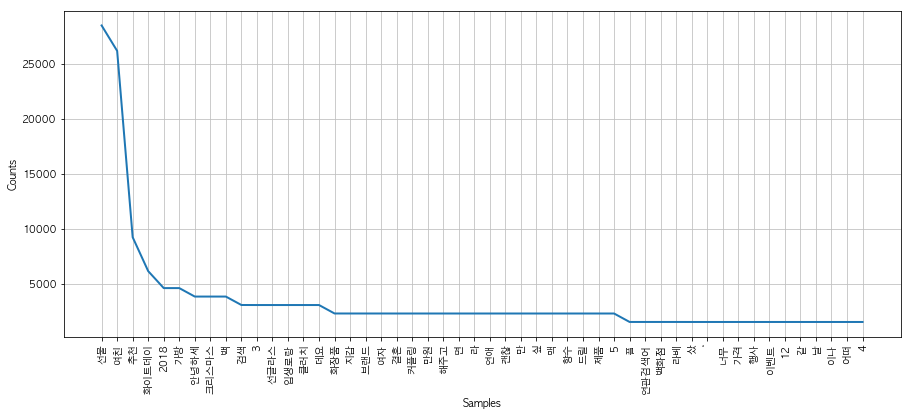

In [42]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [43]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

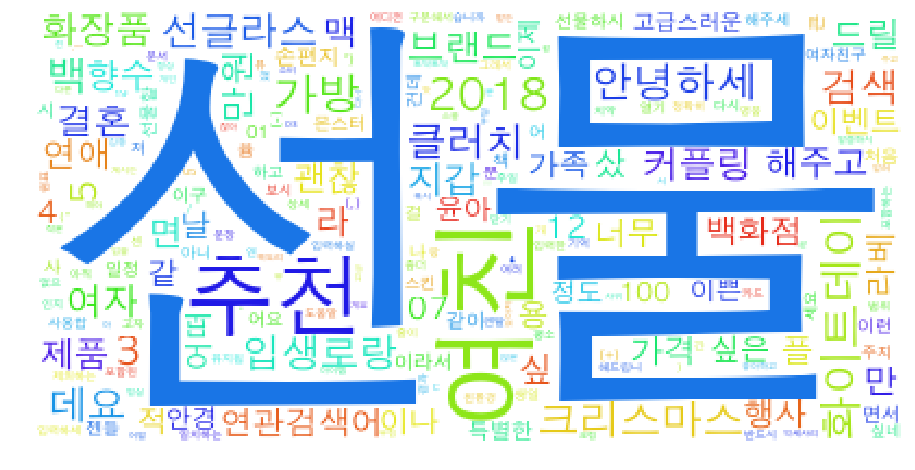

In [44]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(data)

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [45]:
mask = np.array(Image.open('data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [46]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(data)

default_colors = wordcloud.to_array()

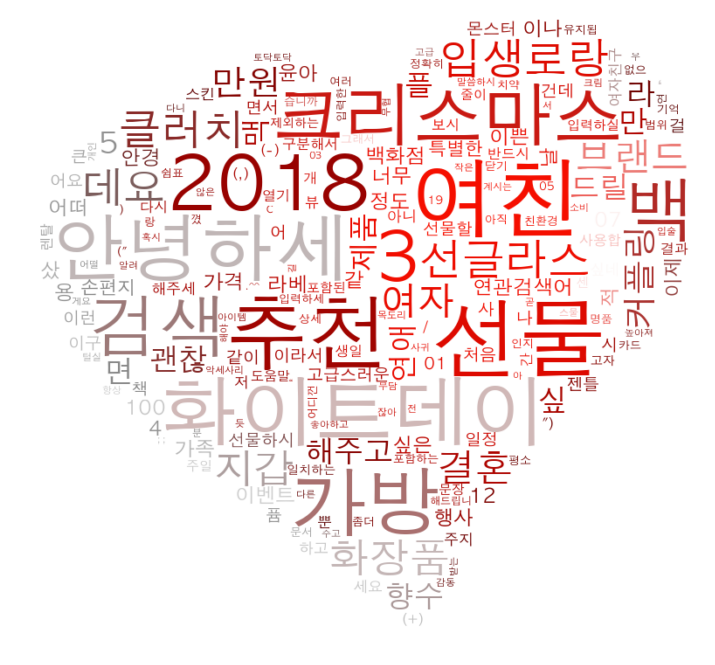

In [47]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import gensim
from gensim.models import word2vec

In [ ]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여친 선물 추천 플 라베 뷰 세다 명품 치약 여친 선물 추천 플 라베 렌탈 백화점 화장품 선물 백화점 화장품 브랜드 여자 카드 지갑 여친 선물 추천 여친 생일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 화이트데이 여친 선물 추천 좀 해주다 2018 03 06 이제 곧 화이트데이 잖다 그래서 화이트데이 여친 선물 화이트데이 여친 선물 좋다 거 해주다 사탕 주기다 좀 민망 하다 일단 지금 화이트데이 여친 선물 답변 화이트데이 여친 선물 준비 하다 정신 없다 그 외 화이트데이 여친 선물 저 향수 정도 제 화이트데이 여친 선물 추천 드리다 싶다 여자 향수 퓸 스킨 가족 행사 이벤트 답변 수 4
질문 여친 선물 어떻다 걸 해주다 요 2018 01 31 여친 여친 선물 하나 해주다 아직 제 학생 물질 적 그렇게 돈 많다 않다 여친 선물 어떻다 걸 하다 하다 모르다 항상 처음 여친 선물 답변 제 여친 선물 추천 좀 해드리다 이쁘다 사랑 계속 이다 바 요 추천 드릴 여친 선물 퓸 스킨 레바 좋다 여친 선물 괜찮다 해 여친 선물 좋다 선물 가족 행사 이벤트 답변 수 5
질문 윤아 선글라스 여친 선물 사주 려고 하다 2018 07 10 선글라스 사다 하다 어디껀 가격 어느 정도 알다 글 여친 선물 괜찮다 알다 감사 하다 내공 많이 드릴 테 빠르다 답변 부탁 하다 답변 안녕하다 ㅎㅎ 이 선글라스 젠틀 몬스터 Merlynn VC 3 제품 이구 윤아 씨 차다 하다 크다 인기 얻다 있다 제품 이예 용 ㅎㅎ 가격 26 만원 이구 젠틀 몬스터 같다 선글라스 안경 답변 수 2
질문 크리스마스 고 2 여친 선물 2017 12 19 제 100 일정 사귀다 헤어졋 다니다 만난 10 일도 안됫는데 크리스마스 다

In [ ]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [ ]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)
model.save('pres_girl.model')

In [ ]:
model = word2vec.Word2Vec.load("pres_girl.model")

In [ ]:
model.most_similar(positive=['선물'])

In [ ]:
model.most_similar(positive=['여자친구'])

In [ ]:
model.most_similar(positive=['여친', '선물'])